# https://www.kaggle.com/yadhua/suicide-numbers-prediction-using-lr-and-rfs/data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('data/master.csv')
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


<AxesSubplot:>

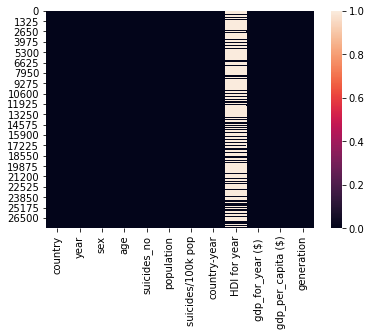

In [4]:
sns.heatmap(data.isna())

In [5]:
for x in data.columns:
    if data[x].isna().sum() > 0:
        print(x, data[x].isna().sum(),data[x].isna().sum()/len(data)*100)

HDI for year 19456 69.93529834651329


In [6]:
drop_col = ['HDI for year']

In [7]:
#data.drop('HDI for year',1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# clean data

In [9]:
data[' gdp_for_year ($) '] =data[' gdp_for_year ($) '].apply(lambda x : int(x.replace(',','')))

In [10]:
data.head(1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X


In [11]:
sex_cat = pd.get_dummies(data['sex'], drop_first=True)
data['is_male'] = sex_cat

In [12]:
data.drop('sex',1,inplace = True)

In [13]:
data.head(2)

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,Albania,1987,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1
1,Albania,1987,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1


In [14]:
drop_col.append('country-year')
drop_col.append('suicides/100k pop')

In [15]:
drop_col

['HDI for year', 'country-year', 'suicides/100k pop']

In [16]:
#data.drop(drop_col,1,inplace=True)

In [17]:
data.head(2)

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,Albania,1987,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1
1,Albania,1987,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1


In [18]:
#stop


In [19]:
target = 'suicides_no'

In [20]:
# for x in data.columns:
#     sns.boxplot(data=data,x=x,y=target)
#     plt.show()

In [21]:
data[target]

0         21
1         16
2         14
3          1
4          9
        ... 
27815    107
27816      9
27817     60
27818     44
27819     21
Name: suicides_no, Length: 27820, dtype: int64

In [22]:
data.corr()[target]

year                 -0.004546
suicides_no           1.000000
population            0.616162
suicides/100k pop     0.306604
HDI for year          0.151399
 gdp_for_year ($)     0.430096
gdp_per_capita ($)    0.061330
is_male               0.144629
Name: suicides_no, dtype: float64

In [23]:
data[target].nunique()

2084

<AxesSubplot:>

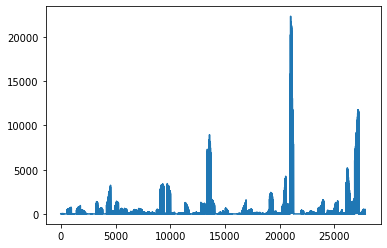

In [24]:
data[target].plot()

In [25]:
data[target].describe()

count    27820.000000
mean       242.574407
std        902.047917
min          0.000000
25%          3.000000
50%         25.000000
75%        131.000000
max      22338.000000
Name: suicides_no, dtype: float64

In [26]:
data.shape[0]

27820

In [27]:
# q1 = data[target].quantile(.25)
# q3 = data[target].quantile(.75)

# IOR = q3 - q1

IQR = (data[target].quantile(.75) - data[target].quantile(.25)) * 1.5
max_ = data[target].quantile(.75)+IQR

In [28]:
data[(data[target] > max_)]

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
589,Argentina,1985,55-74 years,485,1997000,24.29,Argentina1985,0.694,88416668900,3264,G.I. Generation,1
590,Argentina,1985,35-54 years,414,3346300,12.37,Argentina1985,0.694,88416668900,3264,Silent,1
601,Argentina,1986,55-74 years,530,2008300,26.39,Argentina1986,NaN,110934442763,4072,G.I. Generation,1
602,Argentina,1986,35-54 years,478,3365200,14.20,Argentina1986,NaN,110934442763,4072,Silent,1
613,Argentina,1987,55-74 years,532,2034500,26.15,Argentina1987,NaN,111106191358,4026,G.I. Generation,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27796,Uzbekistan,2013,35-54 years,481,3346411,14.37,Uzbekistan2013,0.672,57690453461,2150,Generation X,1
27797,Uzbekistan,2013,25-34 years,328,2644648,12.40,Uzbekistan2013,0.672,57690453461,2150,Millenials,1
27808,Uzbekistan,2014,35-54 years,519,3421300,15.17,Uzbekistan2014,0.675,63067077179,2309,Generation X,1
27810,Uzbekistan,2014,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,63067077179,2309,Millenials,0


In [29]:
data = data[(data[target] < max_)]
data

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,Albania,1987,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1
1,Albania,1987,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1
2,Albania,1987,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,0
3,Albania,1987,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,1
4,Albania,1987,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X,0
27816,Uzbekistan,2014,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent,0
27817,Uzbekistan,2014,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z,1
27818,Uzbekistan,2014,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z,0


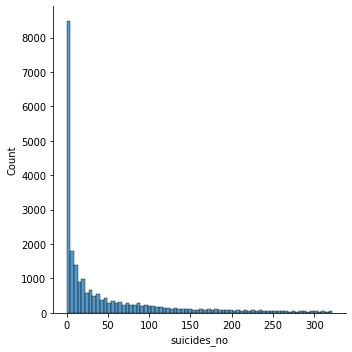

In [30]:
sns.displot(data=data,x=target)

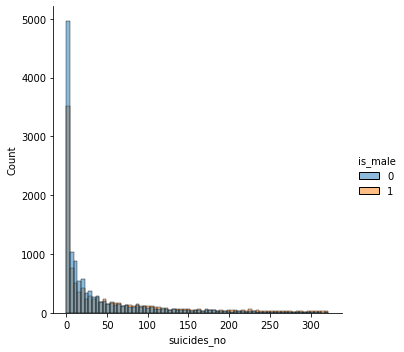

In [31]:
sns.displot(data=data,x=target,hue='is_male')

In [32]:
df_fem = data[data['is_male']== 0]
df_fem.head(1)

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
2,Albania,1987,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,0


In [33]:
fem_sucide_num = df_fem['suicides_no'].sum()

In [34]:
df_male = data[data['is_male']== 1]
df_male.head(1)

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,Albania,1987,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1


In [35]:
male_sucide_num = df_male['suicides_no'].sum()
male_sucide_num

643634

In [36]:
sex_df = pd.DataFrame(columns=['total_sucide'])
sex_df.loc['male_sucide'] = male_sucide_num
sex_df.loc['female_sucide'] = fem_sucide_num
sex_df

,total_sucide
male_sucide,643634
female_sucide,511234


<AxesSubplot:>

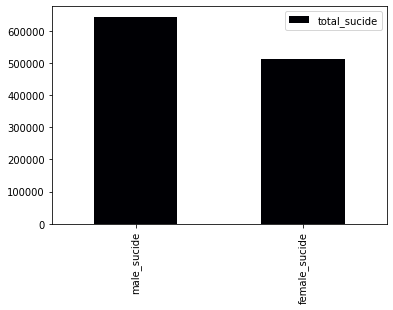

In [37]:
sex_df.plot(kind='bar',colormap='inferno')

<AxesSubplot:>

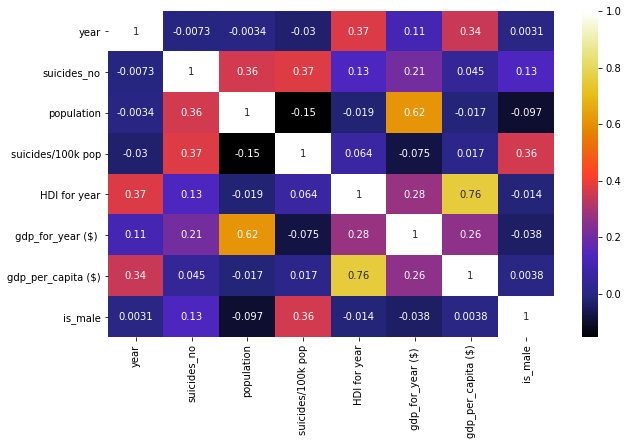

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True, cmap='CMRmap')

In [39]:
#sns.barplot(data=data,x='population',y=target)

In [40]:
obj_df = [x for x in data.columns if data[x].dtype == 'O']
data[obj_df]

,country,age,country-year,generation
0,Albania,15-24 years,Albania1987,Generation X
1,Albania,35-54 years,Albania1987,Silent
2,Albania,15-24 years,Albania1987,Generation X
3,Albania,75+ years,Albania1987,G.I. Generation
4,Albania,25-34 years,Albania1987,Boomers
...,...,...,...,...
27815,Uzbekistan,35-54 years,Uzbekistan2014,Generation X
27816,Uzbekistan,75+ years,Uzbekistan2014,Silent
27817,Uzbekistan,5-14 years,Uzbekistan2014,Generation Z
27818,Uzbekistan,5-14 years,Uzbekistan2014,Generation Z


In [41]:
data['age'].value_counts()

5-14 years     4601
75+ years      4204
15-24 years    4025
25-34 years    3918
55-74 years    3729
35-54 years    3427
Name: age, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


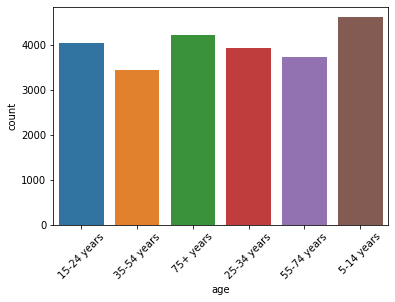

In [42]:
sns.countplot(data['age'])
plt.xticks(rotation=45)
plt.show()

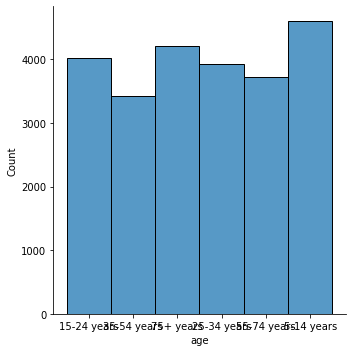

In [43]:
sns.displot(data=data,x='age')

In [44]:
count_df = data.groupby(['country','year']).agg(({target : 'mean','population':'mean'}))

In [45]:
count_df.head(10)

suicides_no     population
country year                            
Albania 1987     6.083333  225800.000000
        1988     5.250000  230358.333333
        1989     5.666667  233591.666667
        1992     3.916667  235208.333333
        1993     6.083333  233941.666667
        1994     4.166667  237441.666667
        1995     7.333333  241950.000000
        1996     7.416667  245016.666667
        1997    14.166667  248108.333333
        1998    12.833333  251058.333333

### age 

#####  6 cats



In [46]:
data

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,Albania,1987,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1
1,Albania,1987,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1
2,Albania,1987,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,0
3,Albania,1987,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,1
4,Albania,1987,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X,0
27816,Uzbekistan,2014,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent,0
27817,Uzbekistan,2014,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z,1
27818,Uzbekistan,2014,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z,0


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
df = data.copy()

In [50]:
df['age'] = le.fit_transform(df['age'])

In [51]:
df.head(3)

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,Albania,1987,0,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1
1,Albania,1987,2,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1
2,Albania,1987,0,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,0


In [52]:
df['generation'].value_counts()

Generation X       5452
Millenials         5399
Silent             5353
Boomers            3816
G.I. Generation    2414
Generation Z       1470
Name: generation, dtype: int64

In [53]:
df.head(2)

,country,year,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,Albania,1987,0,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,1
1,Albania,1987,2,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,1


In [54]:
df.drop(drop_col,1,inplace=True)

In [55]:
df

,country,year,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,Albania,1987,0,21,312900,2156624900,796,Generation X,1
1,Albania,1987,2,16,308000,2156624900,796,Silent,1
2,Albania,1987,0,14,289700,2156624900,796,Generation X,0
3,Albania,1987,5,1,21800,2156624900,796,G.I. Generation,1
4,Albania,1987,1,9,274300,2156624900,796,Boomers,1
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,2,107,3620833,63067077179,2309,Generation X,0
27816,Uzbekistan,2014,5,9,348465,63067077179,2309,Silent,0
27817,Uzbekistan,2014,3,60,2762158,63067077179,2309,Generation Z,1
27818,Uzbekistan,2014,3,44,2631600,63067077179,2309,Generation Z,0


In [56]:
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

In [57]:
le = LabelEncoder()
df['generation'] = le.fit_transform(df['generation'])

In [58]:
df

,country,year,age,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),generation,is_male
0,0,1987,0,21,312900,2156624900,796,2,1
1,0,1987,2,16,308000,2156624900,796,5,1
2,0,1987,0,14,289700,2156624900,796,2,0
3,0,1987,5,1,21800,2156624900,796,1,1
4,0,1987,1,9,274300,2156624900,796,0,1
...,...,...,...,...,...,...,...,...,...
27815,100,2014,2,107,3620833,63067077179,2309,2,0
27816,100,2014,5,9,348465,63067077179,2309,5,0
27817,100,2014,3,60,2762158,63067077179,2309,3,1
27818,100,2014,3,44,2631600,63067077179,2309,3,0


In [59]:
X = df.drop('suicides_no',1)
y = df['suicides_no']

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [64]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [69]:
df_res = pd.DataFrame()
df_res['actual'] = y_test
df_res['pred'] = pred
df_res['MSE'] = mean_squared_error(y_test,pred)
df_res['error'] = y_test - pred


In [70]:
df_res.head()

,actual,pred,MSE,error
7536,0,30.925398,4288.970907,-30.925398
25661,162,113.813135,4288.970907,48.186865
11001,7,46.291731,4288.970907,-39.291731
3616,63,40.191368,4288.970907,22.808632
4594,95,30.447192,4288.970907,64.552808


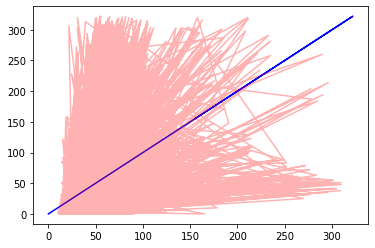

In [71]:
plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)

In [72]:
print(f'MSE: {mean_squared_error(y_test,pred)}')
print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
print(f'MAE: {mean_absolute_error(y_test,pred)}')
print(f'r2: {r2_score(y_test,pred)}')

MSE: 4288.970906738335
SRMSE: 65.49023520142781
MAE: 46.473473360988045
r2: 0.15557697881208188


In [84]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

********** LinearRegression() **********
MSE: 4288.970906738335
SRMSE: 65.49023520142781
MAE: 46.473473360988045
r2: 0.15557697881208188


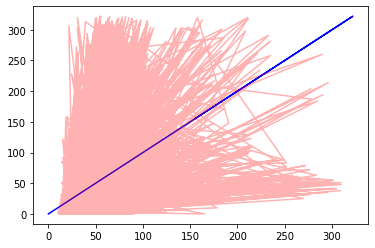

********************
********** Ridge() **********
MSE: 4287.026790948164
SRMSE: 65.47539072772429
MAE: 46.50395136354607
r2: 0.1559597410561664


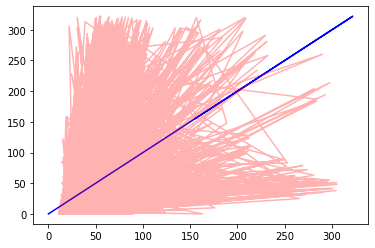

********************
********** Lasso() **********
MSE: 4404.042962070405
SRMSE: 66.36296378304999
MAE: 48.50970353703827
r2: 0.13292131274888974


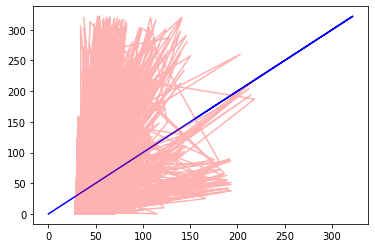

********************
********** AdaBoostRegressor() **********
MSE: 2803.5567012320084
SRMSE: 52.94862322319636
MAE: 37.276625700783384
r2: 0.44802893952798795


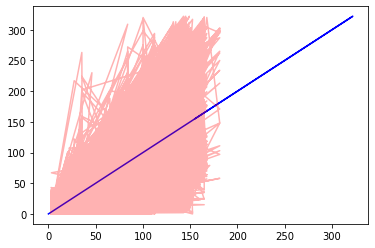

********************
********** DecisionTreeRegressor() **********
MSE: 572.0268728609457
SRMSE: 23.917083284985768
MAE: 10.13411078717201
r2: 0.887377958329577


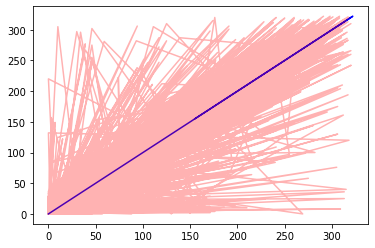

********************
********** RandomForestRegressor() **********
MSE: 310.1264763087844
SRMSE: 17.610408181208758
MAE: 8.501599695778932
r2: 0.9389415452402359


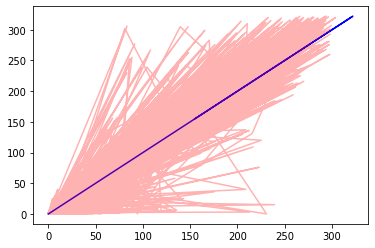

********************


In [85]:
models = [LinearRegression(),Ridge(),Lasso(),AdaBoostRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('*'*10,model,'*'*10)
    print(f'MSE: {mean_squared_error(y_test,pred)}')
    print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
    print(f'MAE: {mean_absolute_error(y_test,pred)}')
    print(f'r2: {r2_score(y_test,pred)}')
    
    df_res = pd.DataFrame()
    df_res['actual'] = y_test
    df_res['pred'] = pred
    df_res['MSE'] = mean_squared_error(y_test,pred)
    df_res['error'] = y_test - pred
    
    plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
    plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)
    plt.show()
    print('*'*20)




In [86]:
model_1 = RandomForestRegressor()